In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [7]:
ly=60
lx=300

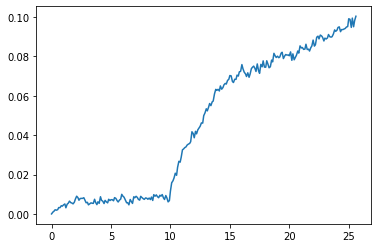

In [771]:
prof_destab=pd.read_csv('f_profiles.dat', sep=' ', names=np.arange(lx), index_col=False)
mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)
plt.plot(mag.t, mag.M, '-')

In [775]:
k=1
plt.matshow((prof_destab.values[k*ly:(k+1)*ly,:]), cmap='PiYG', vmin=3, vmax=-3)
plt.colorbar()

ZeroDivisionError: float division by zero

In [776]:
m=pd.read_csv('f_bands_m.dat', sep=' ', names=np.arange(lx), index_col=False).values
rho=pd.read_csv('f_bands_rho.dat', sep=' ', names=np.arange(lx), index_col=False).values

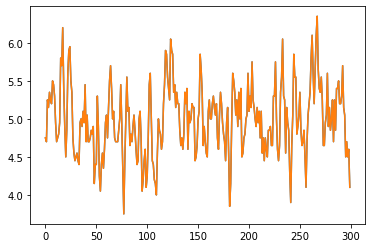

In [777]:
k=-1
plt.plot(m[k,:])
plt.plot(rho[k,:])

# $p_{rev}(h0)$

In [4]:
import subprocess

In [5]:
def rev(h0, beta=2, v=1, D=1):
    with open('f_input.dat', 'w') as f:
        f.write('tgap = 100 tmax = 100 rho0 = 5 lx = 100 ly = 20 w0 = 1 beta = %f v = %f D = %f h0 = %f'%(beta, v, D, h0))
        
    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    return(np.loadtxt('f_mag.dat'))


In [6]:
sample_rev={}
for h0 in np.linspace(10,150,10):
    print(h0)
    sample_rev[h0]=rev(h0, beta=2, v=1, D=1)

10.0
25.555555555555557
41.111111111111114
56.666666666666664
72.22222222222223
87.77777777777777
103.33333333333333
118.88888888888889
134.44444444444446
150.0


In [7]:
p_rev=[np.mean(np.array(sample_rev[s])>0.05) for s in sample_rev]

Text(0, 0.5, 'Probability of reversal')

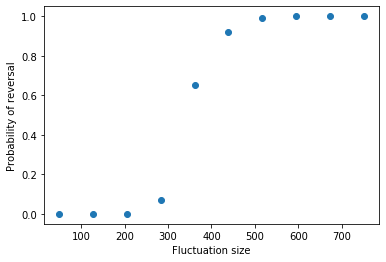

In [9]:
plt.plot(5*np.linspace(10,150,10), p_rev, 'o')
plt.xlabel('Fluctuation size')
plt.ylabel('Probability of reversal')

# $p_{rev}(\beta)$

In [1]:
import subprocess

In [3]:
def rev(h0, beta=2, v=1, D=1):
    with open('f_input.dat', 'w') as f:
        f.write('tgap = 100 tmax = 100 rho0 = 5 lx = 100 ly = 20 w0 = 1 beta = %f v = %f D = %f h0 = %f'%(beta, v, D, h0))
        
    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    return(np.loadtxt('f_mag.dat'))


In [26]:
list_beta=np.arange(1.5, 3.7, 0.2)
list_h0=np.arange(10, 150, 10)

In [27]:
list_beta

array([1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5])

In [58]:
sample_rev_beta={}

for beta in list_beta:
    sample_rev_beta[beta]={}
    for h0 in list_h0:
        try:
            sample_rev_beta[beta][h0]=np.loadtxt('data_beta_h/beta%.1f/h%d/f_mag.dat'%(beta, h0))
        except:
            print(beta,h0)

2.5 10
2.5 20
2.5 30
2.5 40
2.5 50
2.5 60
2.5 70
2.5 80
2.5 90
2.5 100
2.5 110
2.5 120
2.5 130
2.5 140


In [59]:
p_rev={beta:[np.mean(np.array(sample_rev_beta[beta][s])>0.05) for s in sample_rev_beta[beta]] for beta in list_beta}

Text(0, 0.5, 'Probability of reversal')

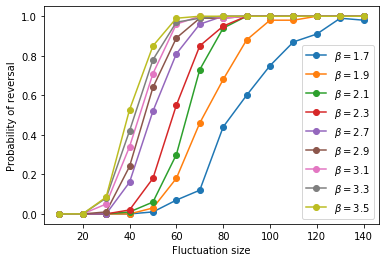

In [60]:
rho0=5
for beta in list_beta[1:]:
    try:
        plt.plot(list_h0, p_rev[beta], 'o-', label=r'$\beta=%.1f$'%beta)
    except:pass
    
plt.legend()
plt.xlabel('Fluctuation size')
plt.ylabel('Probability of reversal')